In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [9]:
dtrain = pd.read_csv('titanic_train.csv')
dtest = pd.read_csv('titanic_test.csv')

In [10]:
dtrain.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

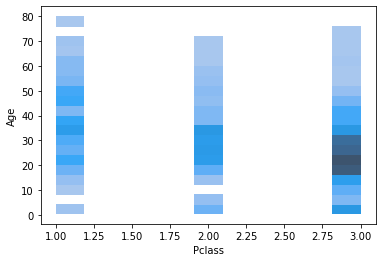

In [16]:
sns.histplot(y=dtrain['Age'],x=dtrain['Pclass'])

In [3]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37            # the number 37 is from the graph. # you can use Pandas to find the exact mean
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

def clean_data(data):   
    
    data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)
    
    sex = pd.get_dummies(data['Sex'], drop_first=True)
    pclass = pd.get_dummies(data['Pclass'], drop_first=True)
    embark = pd.get_dummies(data['Embarked'], drop_first=True)
    data = pd.concat([data, sex, embark, pclass], axis=1)
    
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Pclass', 'Embarked'],axis=1, inplace=True)
    data.dropna(inplace=True)
    return data

In [4]:
dtrain = clean_data(dtrain)
dtest = clean_data(dtest)

In [5]:
X_train = dtrain.drop('Survived',axis=1)
y_train = dtrain['Survived']

# Create a model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)
predictions = logmodel.predict(dtest)

/Users/nour/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [6]:
Survived = list()
Died = list()

for i in predictions:
    if i == 0:
        Died.append(i)
    else:
        Survived.append(i)
        
        
print(len(Survived), len(Died))

153 264


<AxesSubplot:xlabel='Survival', ylabel='count'>

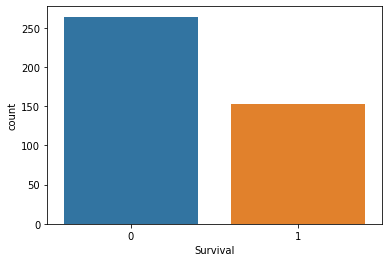

In [7]:
sns.countplot(data=pd.DataFrame(predictions, columns=['Survival']),
              x='Survival')

In [8]:
print('Survival rate = ',len(Survived)/len(predictions))
print('Death rate = ',len(Died)/len(predictions))

Survival rate =  0.3669064748201439
Death rate =  0.6330935251798561
